In [14]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit

#from quantuminspire.credentials import save_account
#save_account('YOUR_API_TOKEN')

from quantuminspire.qiskit import QI
QI.set_authentication()
QI.set_project_name('Charger-mediated Charging q2-q1')
backend = QI.get_backend('Starmon-5')

font = {'family':'serif','size':18}

In [15]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [16]:
from fractions import Fraction
import matplotlib.ticker as ticker

#function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'

In [17]:
theta = np.linspace(0, np.pi, 16)
shots = 1024
y_values = []
charger=2
qubit=1

num_datapoints=10
data_q1=[]
y_values=[] 


#for i in range(num_datapoints):
#    for t in theta:
#        qr = QuantumRegister(5)
#        cr = ClassicalRegister(5)
#        qc = QuantumCircuit(qr,cr)
#        qc.rx(t,charger)
#        qc.cnot(charger,qubit)
#        qc.measure(qr[qubit],cr[qubit])
        
#        job = backend.run(qc,shots)
#        counts = job.result().get_counts()
#        y_values.append(finding_value(counts,qubit,shots))
        
#    data_q1.append(y_values)
#    y_values=[]

In [19]:
print(data_q1)

[]


In [20]:
data_q1=[[0.0283203125, 0.044921875, 0.0849609375, 0.123046875, 0.150390625, 0.23828125, 0.37109375, 0.4326171875, 0.5302734375, 0.6484375, 0.71875, 0.8134765625, 0.841796875, 0.896484375, 0.921875, 0.9375], [0.0390625, 0.060546875, 0.0830078125, 0.1396484375, 0.1630859375, 0.255859375, 0.328125, 0.4365234375, 0.5439453125, 0.630859375, 0.7177734375, 0.8212890625, 0.8349609375, 0.890625, 0.9248046875, 0.9453125], [0.0283203125, 0.029296875, 0.0693359375, 0.1376953125, 0.1650390625, 0.25390625, 0.35546875, 0.421875, 0.54296875, 0.640625, 0.74609375, 0.8212890625, 0.849609375, 0.8935546875, 0.9296875, 0.9326171875], [0.0419921875, 0.046875, 0.080078125, 0.1328125, 0.1494140625, 0.2578125, 0.326171875, 0.4384765625, 0.5517578125, 0.603515625, 0.7431640625, 0.7900390625, 0.8359375, 0.8818359375, 0.9150390625, 0.9384765625], [0.0283203125, 0.060546875, 0.09375, 0.126953125, 0.1494140625, 0.21484375, 0.359375, 0.4599609375, 0.5361328125, 0.6201171875, 0.736328125, 0.8271484375, 0.822265625, 0.8896484375, 0.9287109375, 0.9326171875], [0.0283203125, 0.041015625, 0.0673828125, 0.119140625, 0.1650390625, 0.2451171875, 0.3447265625, 0.4091796875, 0.5244140625, 0.6484375, 0.7509765625, 0.8115234375, 0.8193359375, 0.896484375, 0.91015625, 0.939453125], [0.0341796875, 0.041015625, 0.078125, 0.1298828125, 0.177734375, 0.244140625, 0.322265625, 0.439453125, 0.544921875, 0.6376953125, 0.7294921875, 0.814453125, 0.8291015625, 0.91015625, 0.9306640625, 0.951171875], [0.0390625, 0.046875, 0.068359375, 0.1259765625, 0.14453125, 0.2509765625, 0.3173828125, 0.4375, 0.5380859375, 0.630859375, 0.75, 0.8134765625, 0.8408203125, 0.873046875, 0.919921875, 0.9501953125], [0.01953125, 0.0478515625, 0.0732421875, 0.1279296875, 0.1728515625, 0.25, 0.3349609375, 0.447265625, 0.5283203125, 0.6376953125, 0.7119140625, 0.8203125, 0.828125, 0.900390625, 0.921875, 0.9375], [0.0283203125, 0.041015625, 0.06640625, 0.1337890625, 0.1708984375, 0.2587890625, 0.3369140625, 0.44921875, 0.513671875, 0.6689453125, 0.6982421875, 0.80859375, 0.8408203125, 0.8798828125, 0.931640625, 0.9404296875]]


## Plotting Raw Data

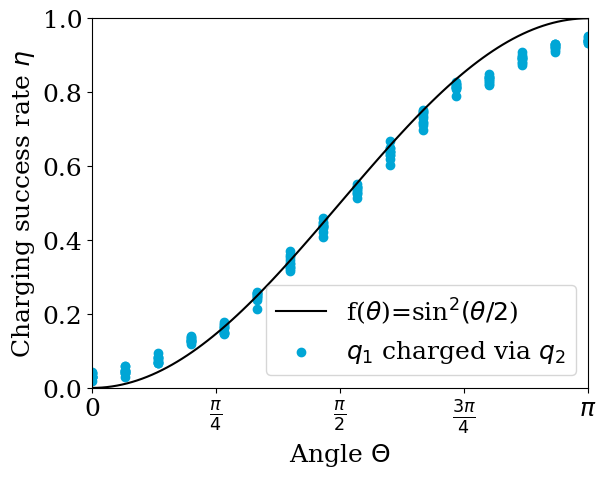

In [21]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data_q1)):
    plt.scatter(theta,data_q1[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_1$ charged via $q_2$"], prop=font, loc="lower right")
plt.show()


## Mean Values & errors

In [22]:
dataF=np.array(data_q1)
data=dataF.transpose()

In [23]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)
print('')

#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)
print('')

#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)
print('')

#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
print('')
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Mean values: [0.03154296875, 0.04599609375, 0.07646484375, 0.1296875, 0.16083984375, 0.24697265625, 0.3396484375, 0.43720703125, 0.53544921875, 0.63671875, 0.7302734375, 0.81416015625, 0.83427734375, 0.8912109375, 0.9234375, 0.94052734375]

Standard Deviation: [0.006522531046678338, 0.008848001166014224, 0.008603177534858215, 0.0060798368813567896, 0.010988389563543663, 0.012363836628521013, 0.016720620879550386, 0.013461339341252473, 0.010795764827375955, 0.01666463203726683, 0.017098491115811944, 0.009638330517321598, 0.009014576446011014, 0.010262738012046602, 0.006726240374110376, 0.00615234375]

Standard Error: [0.0020626054216665583, 0.0027979836424430553, 0.00272056361249446, 0.0019226132347382363, 0.003474833883802149, 0.003909788436434353, 0.005287524587154714, 0.004256849267478842, 0.0034139205938042523, 0.005269819360637517, 0.005407017647811961, 0.0030479077276245226, 0.0028506593711100695, 0.0032453627147655813, 0.0021270239671971843, 0.001945541919830155]

Maximum values:

## Curve Fit

In [24]:
from scipy.optimize import curve_fit

In [25]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [26]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [27]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.95441 with standard error of 0.00525.
The value of phi is -0.08232 with standard error of 0.02726.


In [28]:
x_func = np.linspace(min(theta), max(theta), 1000)
fit_sin2 = sin2_func(x_func, fit_a, fit_b)

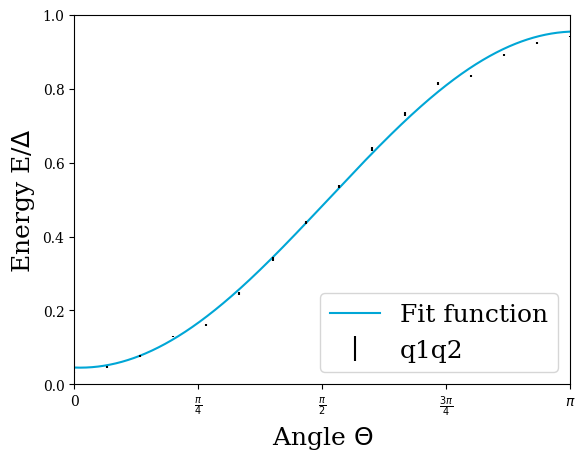

In [29]:

plt.plot(x_func, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["Fit function", "q1q2"], prop=font, loc="lower right")